In [57]:
# 5th Class
# 4th Project
# Date: 30-03-2020


In [58]:
# This problem is about the relationship between some
# characteristics of the car (mileage per year, model year and price)
# and if it was sold or not.

In [59]:
import pandas as pd
from datetime import datetime
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
data = pd.read_csv(uri)

sold_change = {
    'yes' : 1,
    'no'  : 0
}

current_year = datetime.today().year
data['model_age'] = current_year - data.model_year 
data['km_per_year'] = data.mileage_per_year * 1.60934 
data.sold = data.sold.map(sold_change)
data = data.drop(columns = ['Unnamed: 0', 'mileage_per_year', 'model_year'], axis=1) # Axis: 1 - Column, 0 - Row
data.head()

,price,sold,model_age,km_per_year
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806
3,95276.14,0,5,43167.32682
4,117384.68,1,6,12770.11290


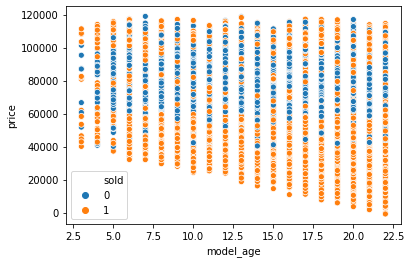

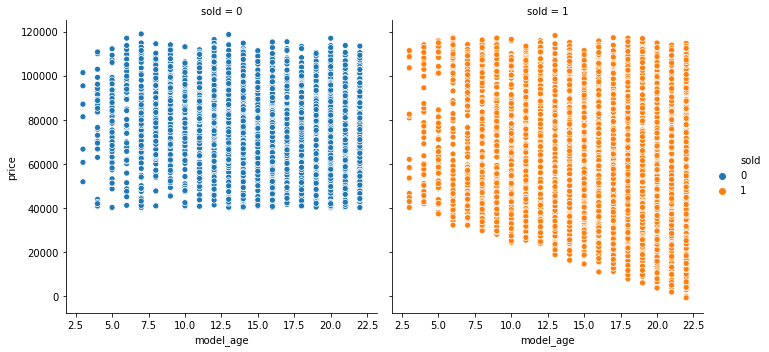

In [60]:
import seaborn as sns

sns.scatterplot(x='model_age', y='price', data=data, hue='sold')
sns.relplot(x='model_age', y='price', data=data, hue='sold', col='sold')

In [61]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import  StandardScaler
from sklearn.dummy import DummyClassifier
import numpy as np

x = data[['model_age', 'price', 'km_per_year']]
y = data['sold']

SEED = 15
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)

# Baseline (default - stratified)
dummy = DummyClassifier()
dummy.fit(raw_train_x, train_y)
predictions = dummy.predict(raw_test_x)
accuracy = dummy.score(test_y, predictions)
print("The accuracy of Dummy algorithm is %.2f%% " % (accuracy*100))

The accuracy of Dummy algorithm is 51.68% 


In [62]:
scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

# Using SVC
model = SVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions)
print("The accuracy of this algorithm is %.2f%% " % (accuracy*100))

The accuracy of this algorithm is 77.20% 


In [67]:
## Decision trees
## Classifiers that can show to us reasons to the taken decisions.

from sklearn.tree import DecisionTreeClassifier

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)

# Using a decision tree machine  
# The argument max_depth is used to define de max size of the thee
tree_model = DecisionTreeClassifier(max_depth = 3)
tree_model.fit(raw_train_x, train_y)
predictions = tree_model.predict(raw_test_x)

accuracy = accuracy_score(test_y, predictions)
print("The accuracy of this algorithm is %.2f%% " % (accuracy*100))

The accuracy of this algorithm is 79.68% 


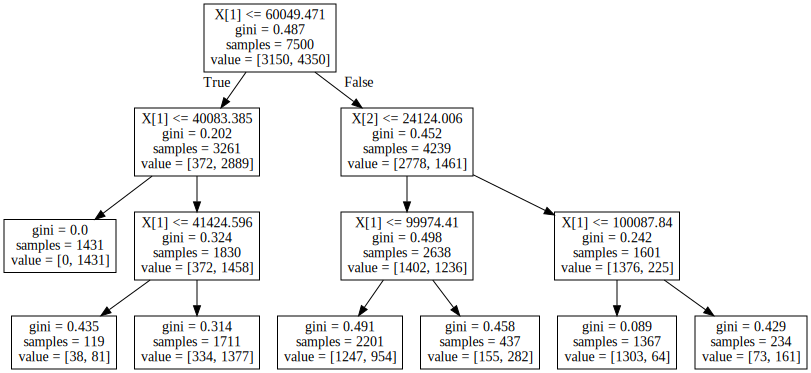

In [68]:
# To see the reasons graphically:
from sklearn.tree import export_graphviz
import graphviz # To visualize

# Return dot data (a type of data)
dot_data = export_graphviz(tree_model)

graph = graphviz.Source(dot_data)
graph

In [69]:
# Verifying the outputs

print(x.head())
print(x.columns)

   model_age      price  km_per_year
0         20   30941.02  35085.22134
1         22   40557.96  12622.05362
2         14   89627.50  11440.79806
3          5   95276.14  43167.32682
4          6  117384.68  12770.11290
Index(['model_age', 'price', 'km_per_year'], dtype='object')


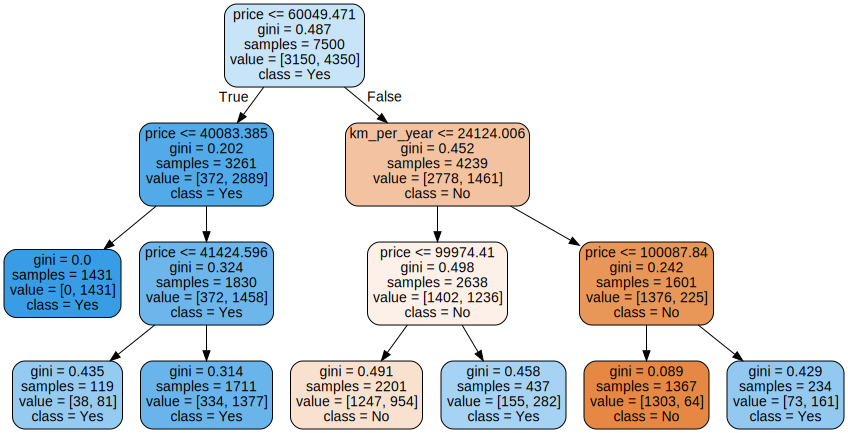

In [70]:
# Return dot data (a type of data)
features = x.columns
dot_data = export_graphviz(tree_model,
                          feature_names = features,
                          filled = True, # Painting the blocks
                          rounded = True, # around the blocks contour
                          class_names = ['No', 'Yes']) # No = 0, Yes = 1 -> mapping the data
graph = graphviz.Source(dot_data)
graph